<a href="https://colab.research.google.com/github/japarra27/cda-projects/blob/master/Taller_No_4_Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio No. 4 - Bank Marketing

***Presentado por:*** Jaime Andrés Parra Mora

# Objetivo

En una entidad financiera de Portugal, se realizó una estrategia comercial con el fin de vender suscripciones de depósitos a plazo, esta campaña comercial se realizó mediante el uso de call center (cada cliente potencial fue contactado por llamada), con el fin de diseñar una nueva estrategia comercial más dirigida, y que optimice costos, la entidad financiera recolectó todos los resultados de sus campañas vía telefónica. Los datos se encuentran en el link https://archive.ics.uci.edu/ml/datasets/bank+marketing junto a la descripción de las variables.

## Actividades en clase

1. Realice una lectura de los datos utilizando Jupyter Notebook.
2. Realice un perfilamiento de los datos (usar pandas profiling) y describa el entendimiento del negocio a partir de este.
3. Realice un proceso de limpieza de los datos en caso de ser necesario, justifique su respuesta.
4. Plantee una hipótesis de interés para el negocio que al resolverlas puedan abarcar el problema planteado por la entidad financiera.
5. A partir de los datos, valide su hipótesis.

## Actividades Individuales

1. Entregar en un jupyter notebook el numeral 1,2 y 3.
2. Plantee cuatro hipótesis de interés para el negocio que al resolverlas puedan abarcar el problema planteado por la entidad financiera. Justifique su respuesta en términos de los datos y análisis realizados para definirlas.
3. Valide por lo menos dos hipótesis planteadas en el ítem anterior, para ello, puede utilizar la práctica de correlaciones y pruebas chi cuadrado.
4. Teniendo en cuenta los resultados del punto 3, plantee una estrategia que permita a la entidad financiera vender más depósitos a plazo.

## Diccionario de datos

Fuente: https://archive.ics.uci.edu/ml/datasets/bank+marketing

### Input variables:
#### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')

# Solución propuesta

In [ ]:
# Instalación de pandas-profiling
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

## Punto No. 1 - Lectura de los datos

In [140]:
# Ignorar warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [9]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from pandas_profiling import ProfileReport

In [10]:
# Leer ficheros
df = pd.read_csv('/content/drive/My Drive/cda/bank-full.csv', sep=";")

# Cambiar variable y
df.y = df.y.map({"yes":True, "no":False})

In [11]:
# Validación tipos de datos
print(df.dtypes, "\n")
print(f"La cantidad de filas es {df.shape[0]} y la cantidad de columnas es {df.shape[1]}")

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                    bool
dtype: object 

La cantidad de filas es 41188 y la cantidad de columnas es 21


## Punto No. 2 - Perfilamiento de datos

In [6]:
# Análisis exploratorio
profile = ProfileReport(df, title='Bank marketing profile report')

In [7]:
profile.to_file("reporte.html")

## Punto No. 3 - Proceso de limpieza de datos

In [12]:
# Configuración de variables
dict_variables = {
    "age": np.int8,
    "job": "category",
    "marital": "category",
    "education": "category",
    "default": "category",
    "housing": "category",
    "loan": "category",
    "contact": "category",
    "month": "category",
    "day_of_week": "category",
    "duration": np.int16,
    "campaign": np.int16,
    "pdays": np.int16,
    "previous": np.int16,
    "poutcome": "category",
    "emp.var.rate": np.float32,
    "cons.price.idx": np.float32,
    "cons.conf.idx": np.float32,
    "euribor3m": np.float32,
    "nr.employed": np.float32
}

In [55]:
# Leer ficheros
df = pd.read_csv('/content/drive/My Drive/cda/bank-full.csv', sep=";", dtype=dict_variables)

# Cambiar variable y
#df.y = df.y.map({"yes":True, "no":False})

In [56]:
# Eliminación de duplicados
df = df.drop_duplicates()

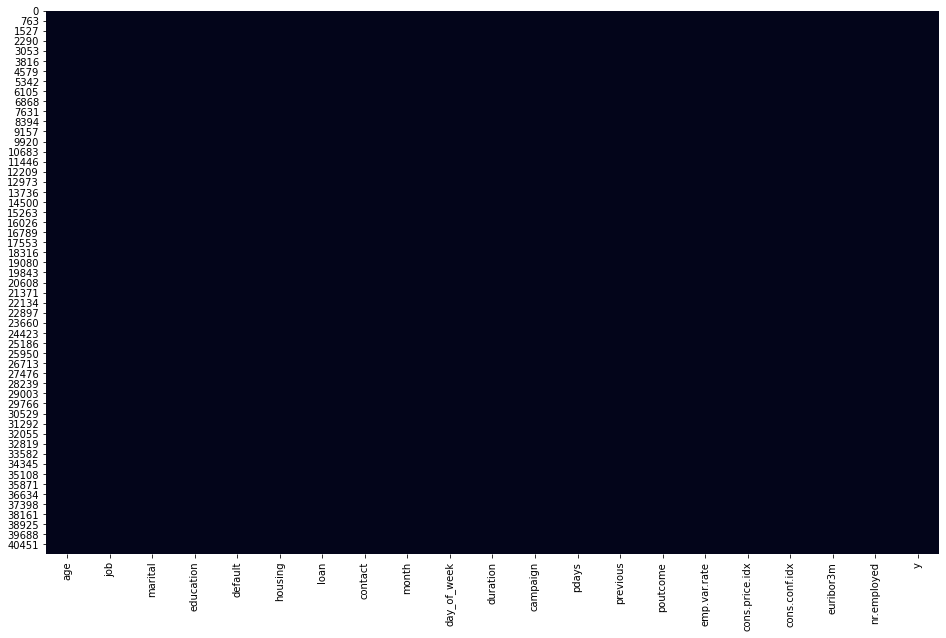

In [57]:
# Overview valores faltantes
plt.figure(figsize=(16, 10))
sns.heatmap(df.isnull(), cbar=False);

## Punto No. 4 - Planteamiento de hipótesis

**Hipótesis**

La edad influye directamente en la suscripción de algún servicio.

## Punto No. 5 - Validación de hipótesis

In [143]:
df_val = pd.crosstab(df.age, df.y, normalize='columns')

In [144]:
df_val.head()

y,no,yes
age,,
17,0.000082,0.000431
18,0.000438,0.002587
19,0.000602,0.004311
20,0.001150,0.004958
21,0.001998,0.006251


In [145]:
df_val = df_val.reset_index()

In [146]:
df_val.columns

Index(['age', 'no', 'yes'], dtype='object', name='y')

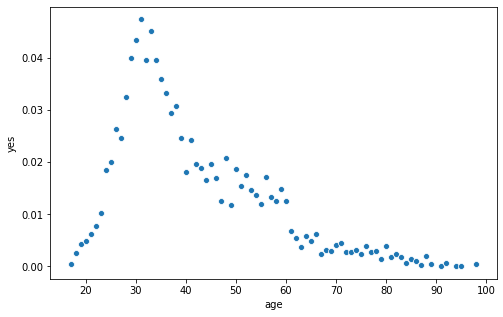

In [147]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df_val.age, df_val.yes)

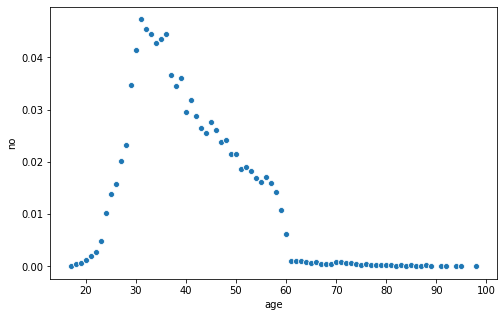

In [148]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df_val.age, df_val.no)

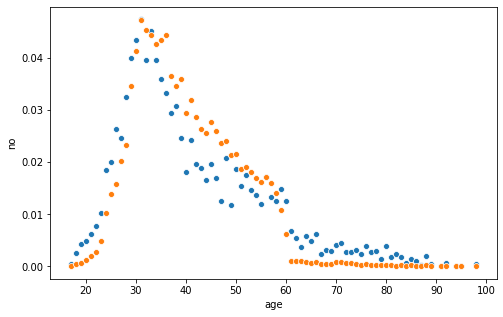

In [150]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df_val.age, df_val.yes)
sns.scatterplot(df_val.age, df_val.no);

In [153]:
chi2, p, dof, expected = chi2_contingency(df_val.values)
print("Chi-squared Statistic %0.3f p_value %0.3f" % (chi2, p))

Chi-squared Statistic 4.808 p_value 1.000


### Conclusiones

Apoyados en la parte visual como en el estadístico utilizado, se observa que no existe una relación entre las variables edad y si está interesado o no en el producto.

Ambos gráficos siguen el mismo comportamiento, por tal motivo pondera la adquisición del producto tanto positiva como negativamente.

También se puede observar que la edad aunque es una variable numérica discreta, se puede hacer agregaciones para validar si existe relaciones por rangos.